In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, BatchNormalization

In [52]:
df = pd.read_csv("mulit_classification_data.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


데이터 전처리
1 데이터 클리닝 (결측치 x / 중복데이터 x / 이상치 제거 )

In [53]:
# target 데이터 -> int bool 타입으로 변경 
target_df=[
              df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults'] 
]

targets = list(map(lambda i: i.astype(bool),target_df))

In [54]:
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df.drop( df[choices].columns, axis=1, inplace=True)
df['class']=np.select(targets,choices)

In [55]:
target_counts=df['class'].value_counts()
target_counts

class
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

In [51]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Assuming your DataFrame is named 'df' and the target column is named 'target'
X = df.drop(columns=['class']).values
y = df['class'].values

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the data and labels
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Count the class distribution after undersampling
unique_classes, class_counts = np.unique(y_undersampled, return_counts=True)
print("Class Distribution after Undersampling:")
for class_name, count in zip(unique_classes, class_counts):
    print(f"Class: {class_name}, Count: {count}")

Class Distribution after Undersampling:
Class: Bumps, Count: 55
Class: Dirtiness, Count: 55
Class: K_Scatch, Count: 55
Class: Other_Faults, Count: 55
Class: Pastry, Count: 55
Class: Stains, Count: 55
Class: Z_Scratch, Count: 55


In [9]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is named 'df' and the target column is named 'target'
X = df.drop(columns=['class']).values
y = df['class'].values

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply upsampling to the data and labels
X_upsampled, y_upsampled = oversampler.fit_resample(X, y)

# Count the class distribution after upsampling
unique_classes, class_counts = np.unique(y_upsampled, return_counts=True)
print("Class Distribution after Upsampling:")
for class_name, count in zip(unique_classes, class_counts):
    print(f"Class: {class_name}, Count: {count}")


Class Distribution after Upsampling:
Class: Bumps, Count: 673
Class: Dirtiness, Count: 673
Class: K_Scatch, Count: 673
Class: Other_Faults, Count: 673
Class: Pastry, Count: 673
Class: Stains, Count: 673
Class: Z_Scratch, Count: 673


In [67]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is named 'df' and the target column is named 'target'
X = df.drop(columns=['class']).values
y = df['class'].values

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data and labels
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after SMOTE
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)
print("Class Distribution after SMOTE:")
for class_name, count in zip(unique_classes, class_counts):
    print(f"Class: {class_name}, Count: {count}")


Class Distribution after SMOTE:
Class: Bumps, Count: 667
Class: Dirtiness, Count: 667
Class: K_Scatch, Count: 667
Class: Other_Faults, Count: 667
Class: Pastry, Count: 667
Class: Stains, Count: 667
Class: Z_Scratch, Count: 667


<Axes: ylabel='count'>

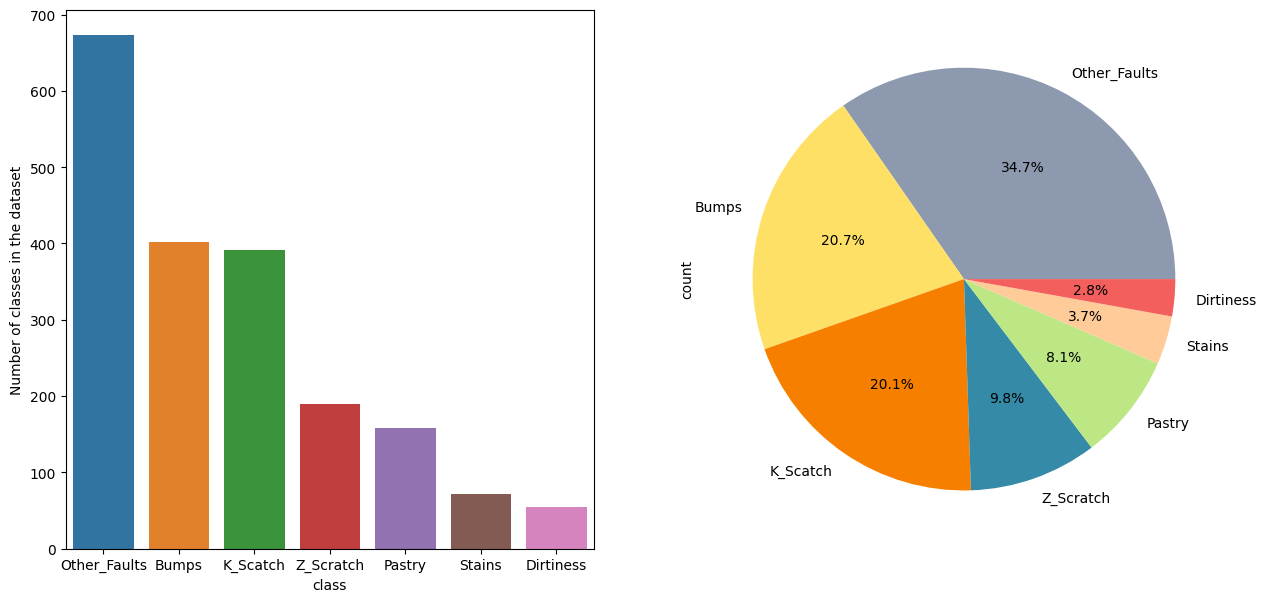

In [56]:
target_counts=df['class'].value_counts() 
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1], colors=colors)
# 다른 종류의 결함 여부, Bumps 결함 여부, K_Scatch 결함 여부 가 가장 높다
# 반면 stain과 dirtiness는 표본이 적어 모델링시 좋은 퍼포먼스가 나오지 않을 확률이 높음 -> 데이터 조정 필요

In [57]:
# TypeOfSteel_A300 TypeOfSteel_A400 Outside_Global_Index  - category 타입
df['TypeOfSteel_A300'] = df['TypeOfSteel_A300'].astype('category',copy=False)
df['TypeOfSteel_A400'] = df['TypeOfSteel_A400'].astype('category',copy=False)
df['Outside_Global_Index'] = df['Outside_Global_Index'].astype('category',copy=False)

2  데이터 타입 처리 

In [11]:
print("중복된 데이터의 비율", df.duplicated().sum()/len(df))  # 중복 데이터 x

중복된 데이터의 비율 0.0


In [12]:
# 결측치 처리 -> 결측치 0  
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
class                    0
dtype: int64

<Axes: >

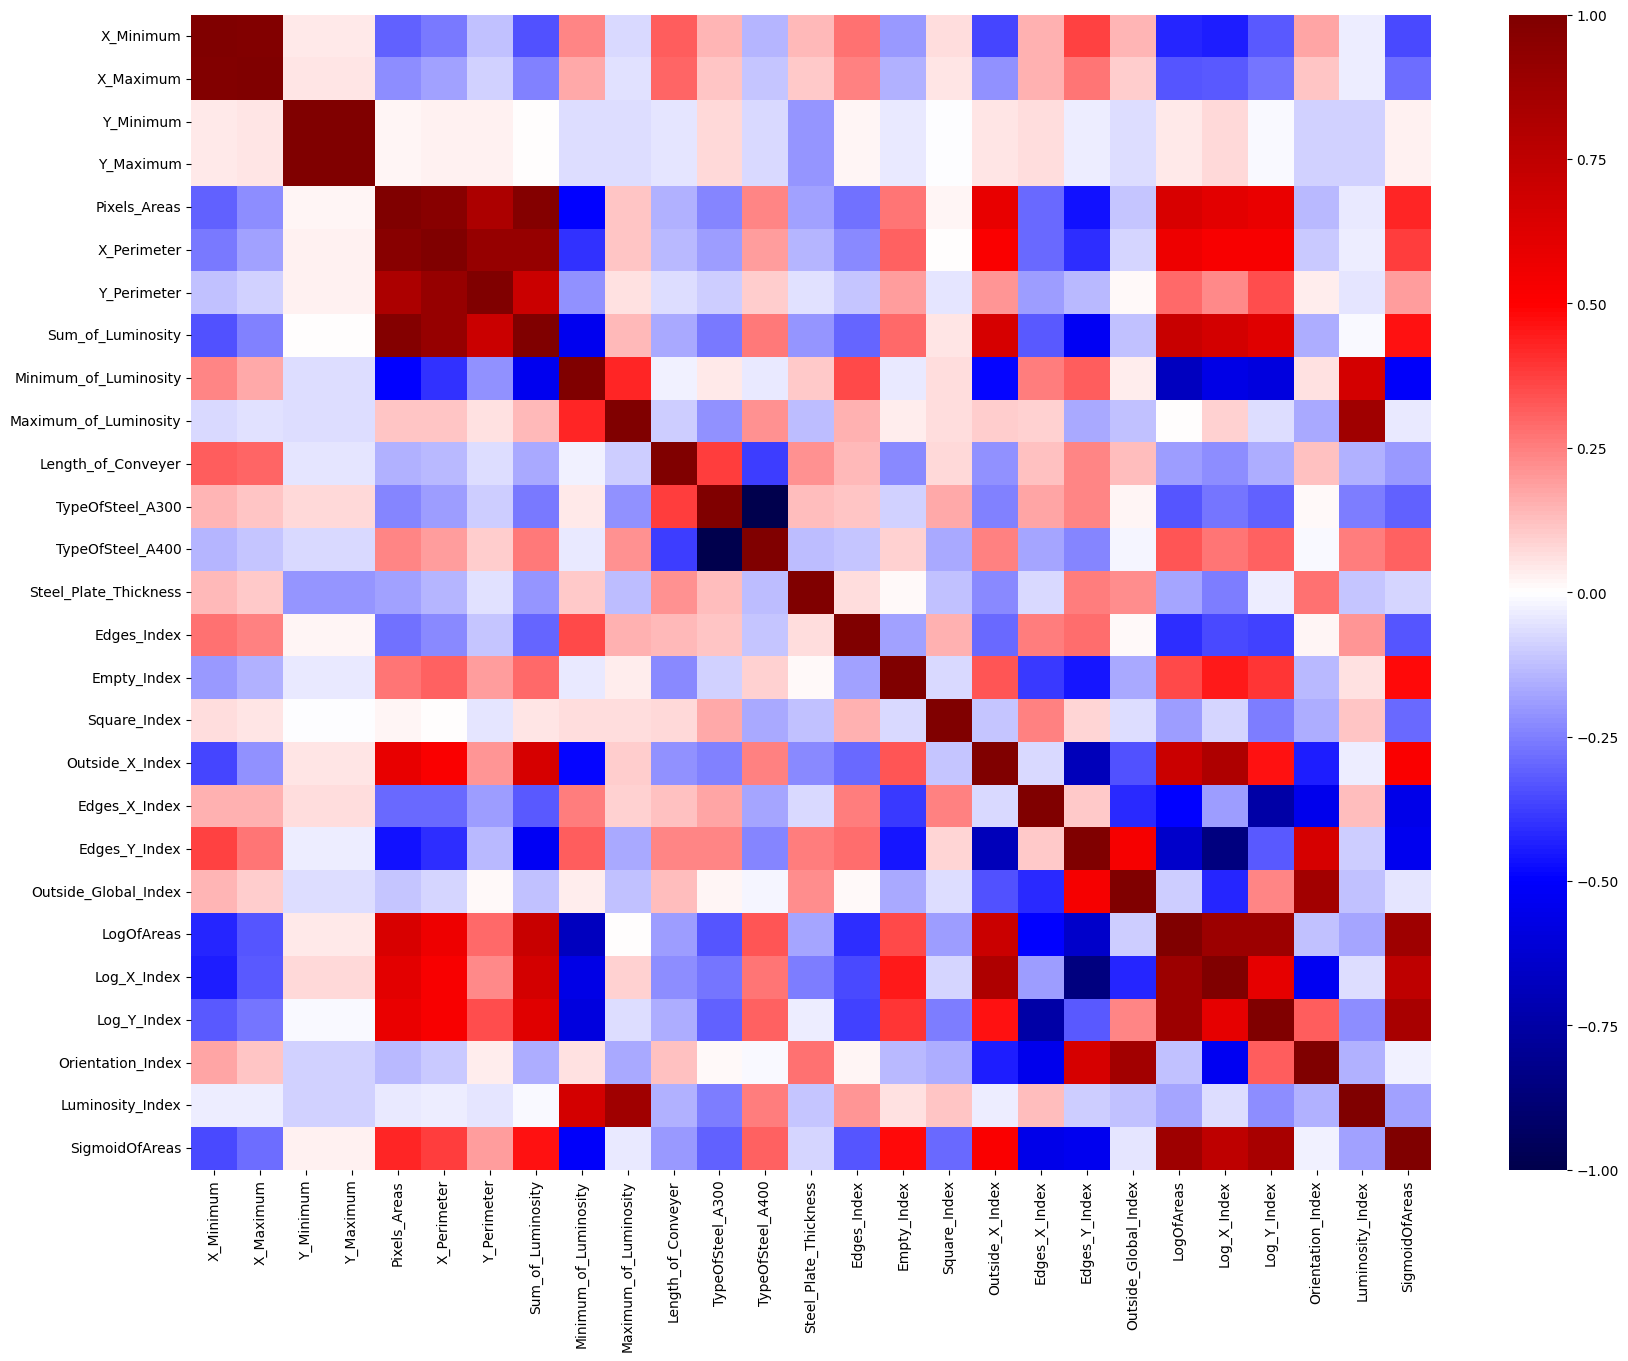

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,:-1].corr(), cmap='seismic')

In [58]:
# 데이터프레임에서 상관계수 행렬 계산
correlation_matrix = df.iloc[:, :-1].corr()

# 상관계수가 높은 순으로 정렬하기 위해 'stack'을 사용하여 행렬을 Series로 변환
correlation_series = correlation_matrix.stack()

# 상관계수가 높은 순으로 정렬
sorted_correlation = correlation_series.sort_values(ascending=False)

# 같은 변수끼리의 상관계수 제외한 결과 출력
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

print(sorted_correlation)



Y_Minimum         Y_Maximum            1.000000
Y_Maximum         Y_Minimum            1.000000
X_Minimum         X_Maximum            0.988314
X_Maximum         X_Minimum            0.988314
Pixels_Areas      Sum_of_Luminosity    0.978952
                                         ...   
Edges_X_Index     Log_Y_Index         -0.748892
Log_X_Index       Edges_Y_Index       -0.855414
Edges_Y_Index     Log_X_Index         -0.855414
TypeOfSteel_A400  TypeOfSteel_A300    -1.000000
TypeOfSteel_A300  TypeOfSteel_A400    -1.000000
Length: 702, dtype: float64


<Axes: xlabel='X_Minimum', ylabel='X_Maximum'>

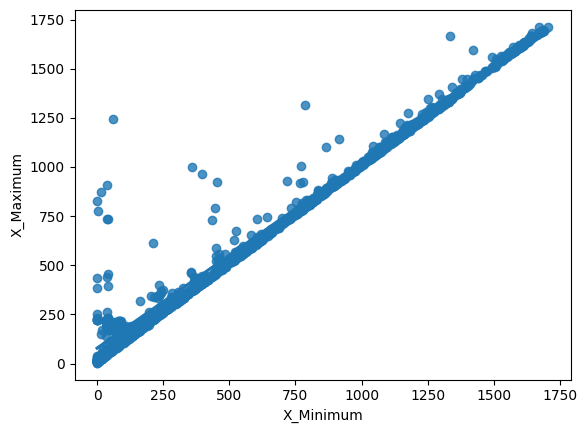

In [14]:
# 상관관계 높은 두 변수 그래프 
sns.regplot(x='X_Minimum', y='X_Maximum', data = df, scatter = True)

In [59]:
skewed_features = df.iloc[:,:-1].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features   # class(설명변수) 제외 이후 데이터 분포 파악 -> 비대칭 데이터가 많이 존재함

Y_Perimeter              39.262786
X_Perimeter              21.522802
Pixels_Areas             14.072936
Sum_of_Luminosity         7.724744
Outside_X_Index           5.177825
Y_Minimum                 2.809040
Y_Maximum                 2.808996
Steel_Plate_Thickness     2.205229
Maximum_of_Luminosity     1.286041
Log_X_Index               1.000240
Length_of_Conveyer        0.850764
LogOfAreas                0.747706
Edges_Index               0.685241
Luminosity_Index          0.678814
X_Maximum                 0.523804
X_Minimum                 0.500510
Log_Y_Index               0.444757
TypeOfSteel_A300          0.406934
Empty_Index               0.293241
SigmoidOfAreas            0.125691
Square_Index             -0.056262
Minimum_of_Luminosity    -0.107015
Orientation_Index        -0.153327
Edges_X_Index            -0.234914
Outside_Global_Index     -0.306185
TypeOfSteel_A400         -0.406934
Edges_Y_Index            -0.927865
dtype: float64

<Axes: xlabel='Y_Perimeter', ylabel='Density'>

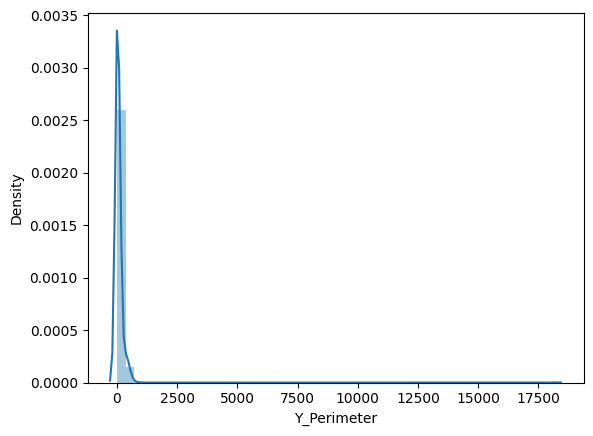

In [37]:
sns.distplot(df['Y_Perimeter']) 

In [60]:
# 비대칭 데이터 정규분포 형태로 변환
skewed_features =skewed_features[abs(skewed_features) > 0.75]

from scipy.special import boxcox1p
lam = 0.15
cols = skewed_features.index

for c in cols:
    df[c] = boxcox1p(df[c], lam)

<Axes: xlabel='Y_Perimeter', ylabel='Density'>

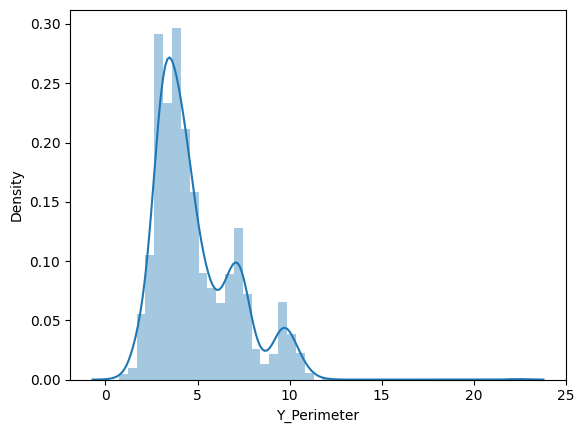

In [17]:
sns.distplot(df['Y_Perimeter'])

In [76]:
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=df.iloc[:,:-1].columns)
features_scaled

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-1.053504,-1.053558,-0.202883,-0.644736,0.124129,-0.285926,-0.266099,-1.242952,...,-0.519330,-0.575331,0.773365,0.879804,-0.083538,-0.953168,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.825835,0.825841,-0.598533,-0.941552,-0.172465,-0.612327,-0.017079,-0.340684,...,-0.540410,-0.043290,0.649673,0.879804,-0.581936,-1.290349,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,0.358130,0.358094,-0.763687,-1.056348,-0.500687,-0.754645,0.449832,-0.227493,...,-0.538493,0.573451,0.577166,0.879804,-0.812814,-1.290349,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.829160,-0.829220,-0.391966,-0.798942,0.142144,-0.395179,0.449832,-0.171469,...,-0.509754,-0.296153,0.773365,0.879804,-0.313021,-1.107330,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.602734,-0.602464,1.020129,0.192685,1.770064,0.986082,-1.480069,-0.171469,...,-0.368507,-1.345434,0.730848,0.879804,1.127655,-0.151148,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.921283,-0.921405,-0.192457,0.115542,-0.398349,-0.112127,1.072381,0.626857,...,-0.216790,-0.378385,-0.296099,-1.193905,-0.071239,0.326212,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.888887,-0.889006,-0.168863,-0.030599,-0.336265,-0.118155,0.854489,0.210528,...,-0.175246,0.386784,-0.375846,-1.193905,-0.043727,0.419138,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.794937,-0.795055,-0.160673,-0.096914,-0.398349,-0.078083,1.103509,0.575923,...,-0.203563,0.470661,-0.488339,-1.193905,-0.034218,0.358328,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.728636,-0.728721,0.015610,0.561620,0.177198,0.091834,1.010126,0.575923,...,-0.146963,-1.111484,-0.583745,-1.193905,0.164584,0.475423,0.194019,-0.287351,0.767876,1.197767


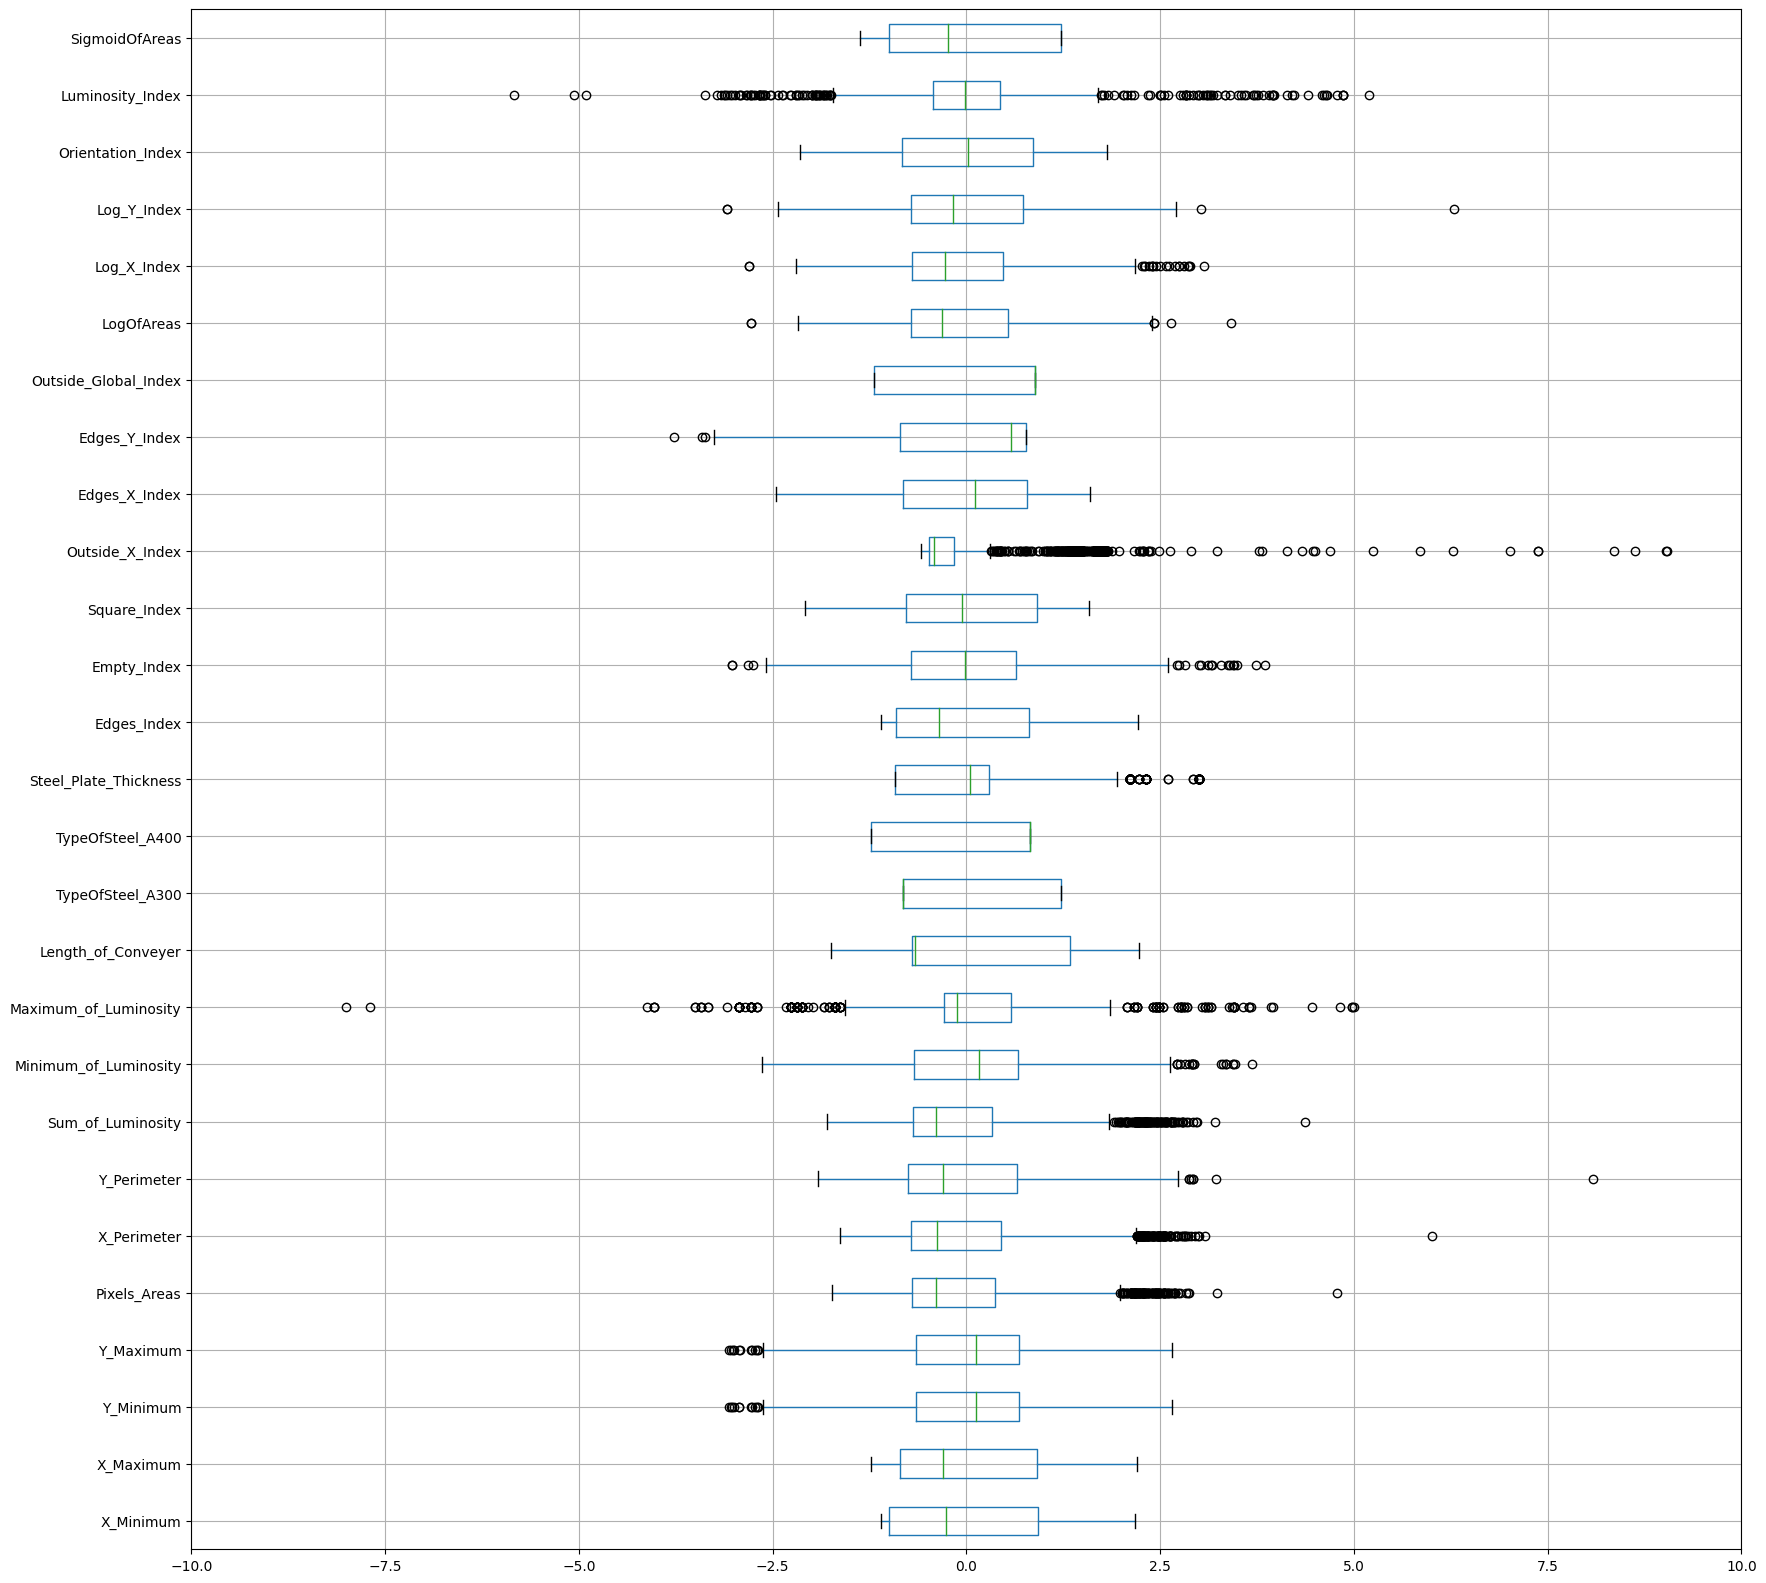

In [19]:
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(20,20)) 
plt.xlim(-10, 10)
plt.show()
# 비대칭 데이터 제거, 표준화 작업 이후에도 이상치 여전히 존재 -> 극단적 이상치 직접 삭제 

In [63]:
df.iloc[:, -1]

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: class, Length: 1941, dtype: object

In [77]:
df.shape,features_scaled.shape

((1941, 28), (1941, 27))

In [75]:
features_scaled.shape

(1940, 27)

In [42]:
df.iloc[:, -1].shape

(1926,)

In [37]:
features_scaled = features_scaled[features_scaled['Pixels_Areas']<4]
df = df[features_scaled['X_Perimeter']<5]
df = df[features_scaled['Y_Perimeter']<7]
df = df[features_scaled['Sum_of_Luminosity']<4]
df = df[features_scaled['Maximum_of_Luminosity']>-7]
df = df[features_scaled['Outside_X_Index']<5]
df = df[features_scaled['Log_Y_Index']<5]
df = df[features_scaled['Luminosity_Index']>-5]

In [36]:
features_scaled

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-1.053504,-1.053558,-0.202883,-0.644736,0.124129,-0.285926,-0.266099,-1.242952,...,-0.519330,-0.575331,0.773365,0.879804,-0.083538,-0.953168,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.825835,0.825841,-0.598533,-0.941552,-0.172465,-0.612327,-0.017079,-0.340684,...,-0.540410,-0.043290,0.649673,0.879804,-0.581936,-1.290349,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,0.358130,0.358094,-0.763687,-1.056348,-0.500687,-0.754645,0.449832,-0.227493,...,-0.538493,0.573451,0.577166,0.879804,-0.812814,-1.290349,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.829160,-0.829220,-0.391966,-0.798942,0.142144,-0.395179,0.449832,-0.171469,...,-0.509754,-0.296153,0.773365,0.879804,-0.313021,-1.107330,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.602734,-0.602464,1.020129,0.192685,1.770064,0.986082,-1.480069,-0.171469,...,-0.368507,-1.345434,0.730848,0.879804,1.127655,-0.151148,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.921283,-0.921405,-0.192457,0.115542,-0.398349,-0.112127,1.072381,0.626857,...,-0.216790,-0.378385,-0.296099,-1.193905,-0.071239,0.326212,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.888887,-0.889006,-0.168863,-0.030599,-0.336265,-0.118155,0.854489,0.210528,...,-0.175246,0.386784,-0.375846,-1.193905,-0.043727,0.419138,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.794937,-0.795055,-0.160673,-0.096914,-0.398349,-0.078083,1.103509,0.575923,...,-0.203563,0.470661,-0.488339,-1.193905,-0.034218,0.358328,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.728636,-0.728721,0.015610,0.561620,0.177198,0.091834,1.010126,0.575923,...,-0.146963,-1.111484,-0.583745,-1.193905,0.164584,0.475423,0.194019,-0.287351,0.767876,1.197767


In [105]:
# 데이터 분류
X = features_scaled
target = 'class'
y= df[target]

In [106]:
X.shape,y.shape

((1941, 27), (1941,))

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 출력
# VIF 값이 큰 순서대로 데이터프레임을 정렬
sorted_vif = vif.sort_values(by='VIF', ascending=False)

# VIF 값이 10 이상인 변수들만 추출
high_vif_variables = sorted_vif[sorted_vif['VIF'] >= 50]

# 결과 출력
print(high_vif_variables)


             Features           VIF
11   TypeOfSteel_A300           inf
12   TypeOfSteel_A400           inf
3           Y_Maximum  4.288374e+07
2           Y_Minimum  4.288370e+07
0           X_Minimum  1.526165e+04
1           X_Maximum  1.393133e+04
21         LogOfAreas  1.761373e+03
4        Pixels_Areas  6.141812e+02
23        Log_Y_Index  6.103731e+02
17    Outside_X_Index  4.733654e+02
6         Y_Perimeter  3.770879e+02
22        Log_X_Index  3.534076e+02
7   Sum_of_Luminosity  2.851755e+02
5         X_Perimeter  1.993704e+02


In [96]:
vif['VIF']

0     1.526165e+04
1     1.393133e+04
2     4.288370e+07
3     4.288374e+07
4     6.141812e+02
5     1.993704e+02
6     3.770879e+02
7     2.851755e+02
8     8.959538e+00
9     6.785259e+00
10    1.721109e+00
11             inf
12             inf
13    1.514765e+00
14    1.339616e+00
15    2.327130e+01
16    1.574613e+00
17    4.733654e+02
18    1.793255e+01
19    3.241079e+01
20    5.747881e+00
21    1.761373e+03
22    3.534076e+02
23    6.103731e+02
24    3.911938e+01
25    1.945048e+01
26    9.484481e+00
Name: VIF, dtype: float64

In [81]:
vif[vif['VIF']> 10]

,Features,VIF
0,X_Minimum,1.526165e+04
1,X_Maximum,1.393133e+04
2,Y_Minimum,4.288370e+07
3,Y_Maximum,4.288374e+07
4,Pixels_Areas,6.141812e+02
5,X_Perimeter,1.993704e+02
6,Y_Perimeter,3.770879e+02
7,Sum_of_Luminosity,2.851755e+02
11,TypeOfSteel_A300,inf
12,TypeOfSteel_A400,inf


In [ ]:
# 예를 들어, 다중공산성이 높은 변수 'Y_Maximum', 'Y_Minimum'을 제거하고 다시 VIF를 계산한다고 가정합니다.
X = X.drop(columns=['Y_Maximum', 'Y_Minimum'])

# VIF 다시 계산
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 업데이트된 VIF 출력
print(vif)


In [107]:
# 클래스 레이블을 문자열에서 숫자로 변환
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(y)

# 클래스 개수 확인
num_classes = len(label_encoder.classes_)
print("클래스 개수:", num_classes)

# 원-핫 인코딩
one_hot_Y = to_categorical(encoded_Y, num_classes=num_classes)

# 원-핫 인코딩 결과 확인
print(one_hot_Y)


클래스 개수: 7
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [109]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_Y, test_size=0.2, random_state=42)

# 다중 분류 모델 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1, callbacks=[lr_scheduler_callback], verbose=1)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 데이터 손실: {loss:.4f}, 정확도: {accuracy:.4f}")

Epoch 1/50
22/22 [==============================] - 1s 14ms/step - loss: 1.9580 - accuracy: 0.3223 - val_loss: 1.5252 - val_accuracy: 0.4038 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 1.2373 - accuracy: 0.5716 - val_loss: 1.2747 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 1.0555 - accuracy: 0.6347 - val_loss: 1.1208 - val_accuracy: 0.6859 - lr: 0.0010
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.9464 - accuracy: 0.6734 - val_loss: 1.0132 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.8762 - accuracy: 0.6977 - val_loss: 0.9256 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.8098 - accuracy: 0.7085 - val_loss: 0.8544 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7836 - 

In [124]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

def get_pipeline():
    return make_pipeline(
        RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight="balanced"
        ),
    )


pipe = get_pipeline()
pipe.fit(X_train, y_train)
print("검증 정확도", pipe.score(X_test, y_test))

검증 정확도 0.6812339331619537


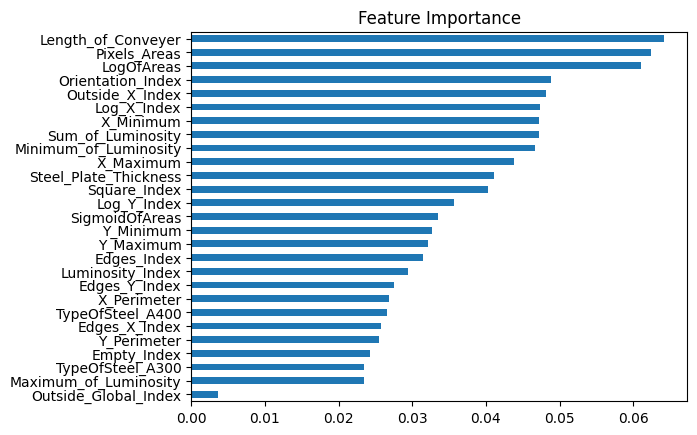

Text(0.5, 1.0, 'Cardinality')

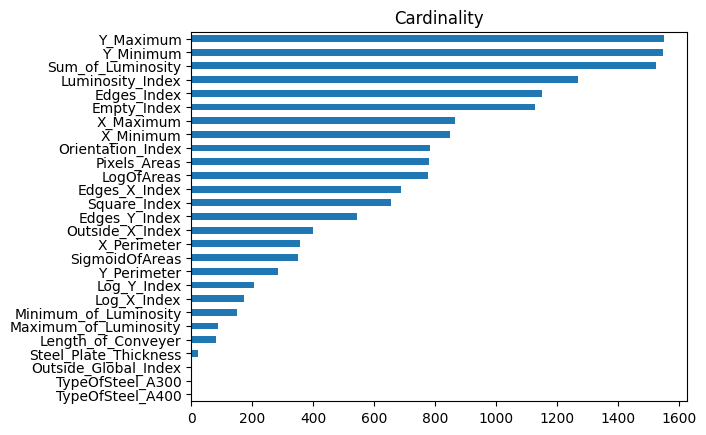

In [126]:
# 특성 중요도
rf = pipe.named_steps["randomforestclassifier"]
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")

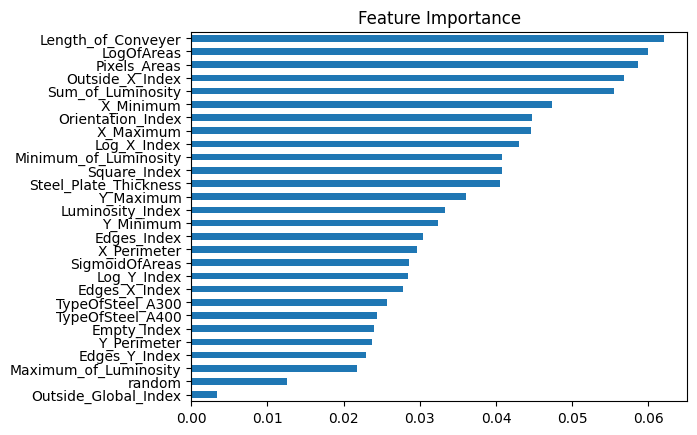

Text(0.5, 1.0, 'Cardinality')

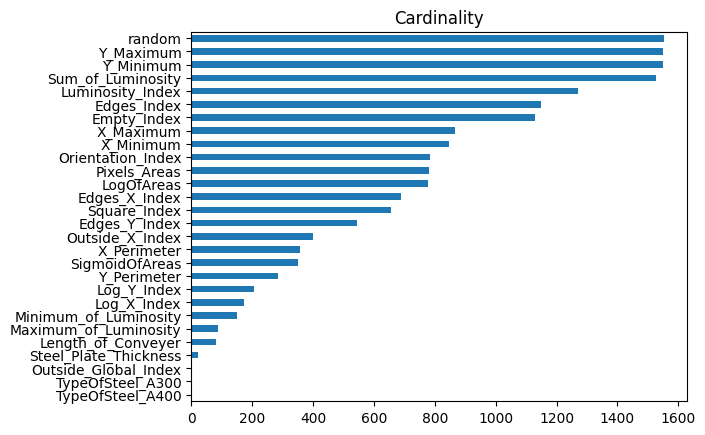

In [128]:
import numpy as np

rand = np.random.RandomState(seed=2)

X_train_random_added = X_train.copy()
X_train_random_added["random"] = rand.randn(len(X_train))

pipe_random_added = get_pipeline()
pipe_random_added.fit(X_train_random_added, y_train)

rf = pipe_random_added.named_steps["randomforestclassifier"]
importances_random_added = pd.Series(
    rf.feature_importances_, X_train_random_added.columns
)

importances_random_added.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train_random_added.nunique().sort_values().plot.barh()
plt.title("Cardinality")

In [130]:
# 모든 column을 사용해 학습했을 때의 검증 정확도
features = X_train.columns.tolist()
score = pipe.score(X_test, y_test)

print(f'Before Drop :: 검증 정확도 {score:.6f}')
dci = pd.Series(dtype=float)

for feature in features:
    p = get_pipeline()

    # feature을 drop하여 모델을 재학습합니다.
    p.fit(X_train.drop(columns=[feature], axis=1), y_train)
    score_dropped = p.score(X_test.drop(columns=[feature], axis=1), y_test)
    print(f"Drop {feature} :: 검증 정확도 {score_dropped:.6f}")

    # drop-column importance는 해당 특성을 drop했을 때의 성능 하락폭으로 정의됩니다.
    dci[feature] = score - score_dropped

Before Drop :: 검증 정확도 0.681234
Drop X_Minimum :: 검증 정확도 0.683805
Drop X_Maximum :: 검증 정확도 0.678663
Drop Y_Minimum :: 검증 정확도 0.676093
Drop Y_Maximum :: 검증 정확도 0.676093
Drop Pixels_Areas :: 검증 정확도 0.681234
Drop X_Perimeter :: 검증 정확도 0.681234
Drop Y_Perimeter :: 검증 정확도 0.676093
Drop Sum_of_Luminosity :: 검증 정확도 0.681234
Drop Minimum_of_Luminosity :: 검증 정확도 0.676093
Drop Maximum_of_Luminosity :: 검증 정확도 0.665810
Drop Length_of_Conveyer :: 검증 정확도 0.658098
Drop TypeOfSteel_A300 :: 검증 정확도 0.686375
Drop TypeOfSteel_A400 :: 검증 정확도 0.686375
Drop Steel_Plate_Thickness :: 검증 정확도 0.658098
Drop Edges_Index :: 검증 정확도 0.683805
Drop Empty_Index :: 검증 정확도 0.673522
Drop Square_Index :: 검증 정확도 0.676093
Drop Outside_X_Index :: 검증 정확도 0.673522
Drop Edges_X_Index :: 검증 정확도 0.686375
Drop Edges_Y_Index :: 검증 정확도 0.673522
Drop Outside_Global_Index :: 검증 정확도 0.691517
Drop LogOfAreas :: 검증 정확도 0.673522
Drop Log_X_Index :: 검증 정확도 0.681234
Drop Log_Y_Index :: 검증 정확도 0.678663
Drop Orientation_Index :: 검증 정확도 0.686375


Text(0.5, 1.0, 'Drop-Column Importance')

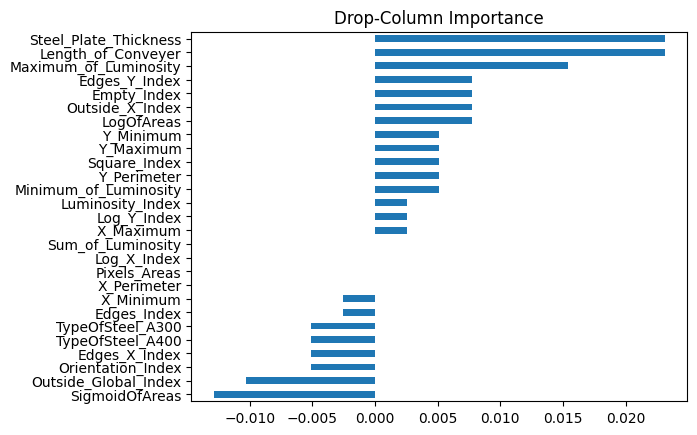

In [131]:
%matplotlib inline
dci.sort_values().plot.barh()
plt.title("Drop-Column Importance")

In [ ]:
# 데이터 자세히 보고 관련 상관관계 정보 직접 알아봐야할듯 -> 뭘 삭제할지